In [2]:
#roc_auc
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


In [3]:
iris = load_iris()
X, y, names = iris.data, iris.target, iris.target_names

[[50  0]
 [ 0 50]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



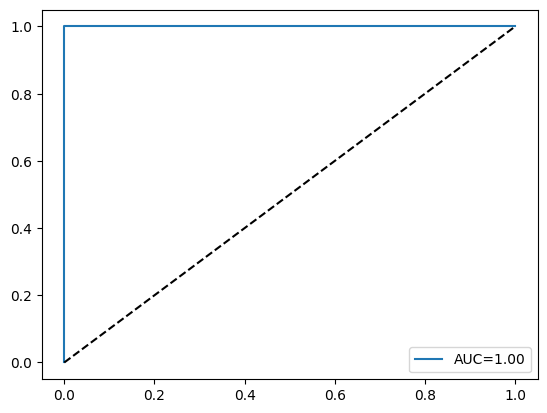

In [4]:
# --- Binary Logistic Regression (0 vs 1) ---
mask = y < 2
Xb, yb = X[mask], y[mask]
bin_model = LogisticRegression().fit(Xb, yb)
p = bin_model.predict(Xb)
prob = bin_model.predict_proba(Xb)[:,1]

print(confusion_matrix(yb, p))
print(classification_report(yb, p, target_names=names[:2]))

fpr, tpr, _ = roc_curve(yb, prob)
plt.plot(fpr, tpr, label=f"AUC={auc(fpr,tpr):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.legend(); 
plt.show()

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.90      0.94        50
   virginica       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



C:\Users\SANANDITA HAZRA\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


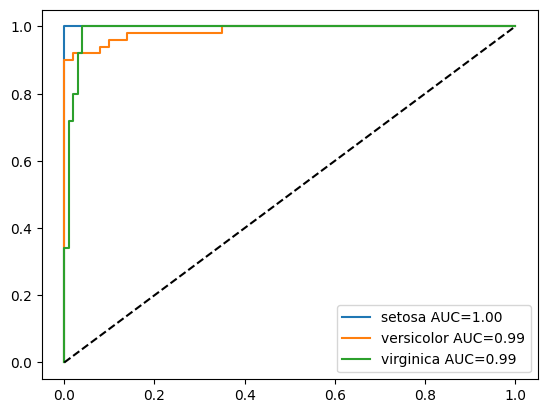

In [5]:
# --- Multiclass Logistic Regression ---
multi = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X, y)
pm = multi.predict(X)
probm = multi.predict_proba(X)
ybm = label_binarize(y, classes=[0,1,2])

print(confusion_matrix(y, pm))
print(classification_report(y, pm, target_names=names))

for i in range(3):
    fpr, tpr, _ = roc_curve(ybm[:,i], probm[:,i])
    plt.plot(fpr, tpr, label=f"{names[i]} AUC={auc(fpr,tpr):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.legend(); plt.show()